In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from pulser.devices import Chadoq2
from pulser import Pulse, Sequence, Register


from src.mapping import create_coordinates
from src.qubo_tools import build_qubo_matrix, brute_force
from src.quantum_solver_vqaa import VQAA, plot_solution_vqaa

In [2]:
import warnings
warnings.filterwarnings("ignore")

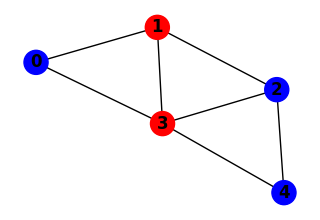

In [3]:
Graph_Example_encoding  = nx.Graph()
Graph_Example_encoding .add_edges_from([[0,1],[1,2], [1,3], [0,3],[3,2],[3,4],[2,4]])

plt.figure(figsize=(3,2)) 
nx.draw(Graph_Example_encoding ,with_labels=True,node_color = ['b','r','b','r','b'],font_weight='bold')

In [4]:
Q_example_encoding = build_qubo_matrix(Graph_Example_encoding)
coords_example = create_coordinates(Q_example_encoding)

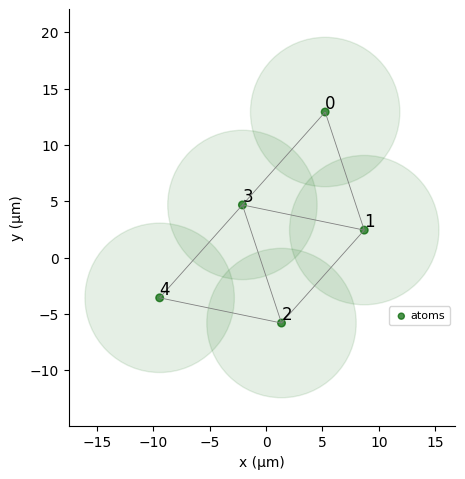

In [5]:
qubits_example = dict(enumerate(coords_example))
reg_example = Register(qubits_example)
reg_example.draw(
    blockade_radius=Chadoq2.rydberg_blockade_radius(1.0),
    draw_graph=True,
    draw_half_radius=True,
)

In [6]:
opt_parameters = VQAA(reg_example,
                      Q_example_encoding)

In [7]:
print("Optimal time evolution (ns):", opt_parameters[0])
print("Optimal omega:", opt_parameters[1])
print("Optimal detuning:", opt_parameters[2])

Optimal time evolution (ns): 23045.765215084873
Optimal omega: 4.273203206201011
Optimal detuning: 4.5195488428076045


Best solution: 10101 with 5.0 cuts


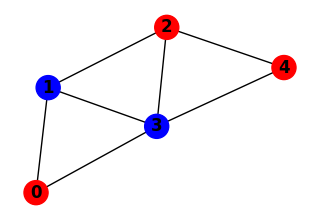

In [8]:
plot_solution_vqaa(Graph_Example_encoding , 
              Q_example_encoding,
              opt_parameters,
              reg_example)

In [9]:
brute_force(Q_example_encoding)[:7]

[('00110', -5.0),
 ('01001', -5.0),
 ('01010', -5.0),
 ('01011', -5.0),
 ('10100', -5.0),
 ('10101', -5.0),
 ('10110', -5.0)]